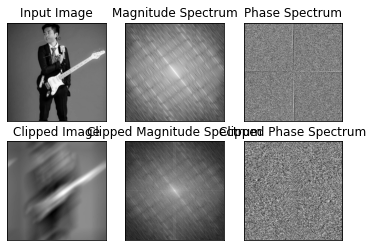

array([[89, 88, 88, ..., 89, 89, 89],
       [89, 88, 88, ..., 89, 89, 89],
       [89, 88, 88, ..., 89, 89, 89],
       ...,
       [88, 88, 88, ..., 89, 88, 88],
       [88, 88, 88, ..., 89, 89, 88],
       [88, 88, 88, ..., 89, 89, 89]], dtype=uint8)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def fourier_transform(image_path, aperture_path):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    ap = cv2.resize(ap,size)
    
    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_clipped = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_clipped = np.fft.ifftshift(fshift_clipped).real # shifting back
    # img_clipped = cv2.normalize(img_clipped, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_clipped = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_clipped))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    phase_spectrum_clipped = np.angle(fshift_clipped)

    
    
    
    
    # Display images
    plt.subplot(231),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_clipped) , cmap = 'gray')
    plt.title('Clipped Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
    plt.show()
    


    
    return img_clipped

fourier_transform('input_image.jpg', 'motion_psf.png')



    
    


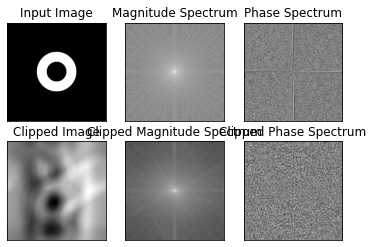

array([[133, 133, 133, ..., 134, 134, 133],
       [133, 133, 133, ..., 134, 134, 133],
       [133, 133, 133, ..., 134, 134, 133],
       ...,
       [133, 133, 133, ..., 134, 134, 134],
       [133, 133, 133, ..., 134, 134, 134],
       [133, 133, 133, ..., 134, 134, 134]], dtype=uint8)

In [246]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def fourier_transform(image_path, inner_radius, outer_radius):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    # ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    # ap = cv2.resize(ap,size)
    
    
    # Set image size and parameters
    size = (500, 500)
   

    # Generate synthetic circular disc image
    cx, cy = size[0]//2, size[1]//2
    x, y = np.meshgrid(np.arange(size[0]), np.arange(size[1]))
    d = np.sqrt((x - cx)**2 + (y - cy)**2)
    ap = np.zeros_like(d)
    ap[(d >= inner_radius) & (d <= outer_radius)] = 1


    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_clipped = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_clipped = np.fft.ifftshift(fshift_clipped).real # shifting back
    # img_clipped = cv2.normalize(img_clipped, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_clipped = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_clipped))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    phase_spectrum_clipped = np.angle(fshift_clipped)

    
    
    
    
    # Display images
    plt.subplot(231),plt.imshow(ap, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_clipped) , cmap = 'gray')
    plt.title('Clipped Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
    plt.show()
    

    
    return img_clipped

fourier_transform('input_image.jpg', 50, 100)



    
    


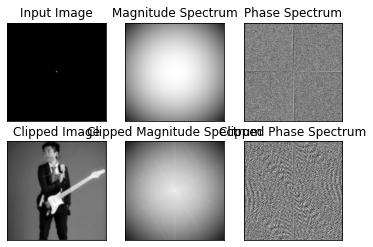

array([[ 65,  59,  56, ...,  84,  79,  72],
       [ 62,  57,  54, ...,  79,  74,  68],
       [ 60,  55,  53, ...,  75,  71,  66],
       ...,
       [ 74,  66,  61, ..., 100,  93,  84],
       [ 72,  65,  60, ...,  96,  90,  81],
       [ 69,  62,  58, ...,  91,  85,  77]], dtype=uint8)

In [28]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def fourier_transform(image_path, sigma):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    # ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    # ap = cv2.resize(ap,size)
    
    
    # Set image size and parameters
    size = (500, 500)
   

 

    # Generate synthetic Gaussian image
    cx, cy = size[0]//2, size[1]//2
    x, y = np.meshgrid(np.arange(size[0]), np.arange(size[1]))
    ap = np.exp(-(x-cx)**2/(2*sigma**2) - (y-cy)**2/(2*sigma**2))



    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_clipped = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_clipped = np.fft.ifftshift(fshift_clipped).real # shifting back
    # img_clipped = cv2.normalize(img_clipped, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_clipped = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_clipped))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    phase_spectrum_clipped = np.angle(fshift_clipped)

    
    
    
    
    # Display images
    plt.subplot(231),plt.imshow(ap, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_clipped) , cmap = 'gray')
    plt.title('Clipped Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
    plt.show()
    


    
    return img_clipped

fourier_transform('input_image.jpg', 2)



    
    


C:\Users\Lyle\AppData\Local\Temp\ipykernel_38588\3331160855.py:45: RuntimeWarning: divide by zero encountered in log
  a_magnitude_spectrum = 20*np.log(np.abs(fashift))
C:\Users\Lyle\AppData\Local\Temp\ipykernel_38588\3331160855.py:64: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_convolved = 20*np.log(np.abs(fshift_convolved))


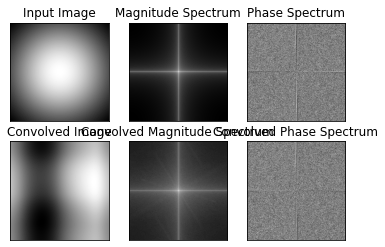

In [47]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def gaussian_convolve(image_path, sigma):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    # ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    # ap = cv2.resize(ap,size)
    
    
    # Set image size and parameters
    size = (500, 500)
   

 

    # Generate synthetic Gaussian image
    cx, cy = size[0]//2, size[1]//2
    x, y = np.meshgrid(np.arange(size[0]), np.arange(size[1]))
    ap = np.exp(-(x-cx)**2/(2*sigma**2) - (y-cy)**2/(2*sigma**2))



    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_convolved = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_convolved = np.fft.ifftshift(fshift_convolved).real # shifting back
    # img_convolved = cv2.normalize(img_convolved, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_convolved = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_convolved))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_convolved = 20*np.log(np.abs(fshift_convolved))
    phase_spectrum_convolved = np.angle(fshift_convolved)

    
    
    
    # Display images
    plt.subplot(231),plt.imshow(ap, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_convolved) , cmap = 'gray')
    plt.title('Convolved Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_convolved, cmap = 'gray')
    plt.title('Convolved Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_convolved, cmap = 'gray')
    plt.title('Convolved Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
   
    

#          # for a rendering
#     plt.imsave(f'gaussian_convolved/a_convolved_image_{sigma}.jpg', img_convolved, cmap='gray')
#     plt.imsave(f'gaussian_convolved_magnitude/a_convolved_magnitude_spectrum_{sigma}.jpg', 
#                magnitude_spectrum_convolved, cmap='gray')
#     plt.imsave(f'gaussian_convolved_phase/a_convolved_phase_spectrum_{sigma}.jpg',
#                phase_spectrum_convolved, cmap='gray')
#     plt.imsave(f'gaussian/a_gaussian_{sigma}.jpg',
#                ap, cmap='gray')
    
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_convolved.shape[1]), np.arange(magnitude_spectrum_convolved.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_convolved, cmap='magma')
#     fig.savefig(f'gaussian_convolved_3d_magnitude/a_3d_convolved_magnitude_spectrum_{sigma}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_convolved, cmap='magma')
#     fig.savefig(f'gaussian_convolved_3d_phase/a_3d_convolved_phase_spectrum_{sigma}.jpg', dpi = 200)



    
#     # for b rendering
#     dummy_sigma = 200 - sigma
#     # plt.imsave(f'gaussian_convolved/b_convolved_image_{dummy_sigma}.jpg', img_convolved, cmap='gray')
#     # plt.imsave(f'gaussian_convolved_magnitude/b_convolved_magnitude_spectrum_{dummy_sigma}.jpg', 
#     #           magnitude_spectrum_convolved, cmap='gray')
#     # plt.imsave(f'gaussian_convolved_phase/b_convolved_phase_spectrum_{dummy_sigma}.jpg',
#     #           phase_spectrum_convolved, cmap='gray')
#     plt.imsave(f'gaussian/b_gaussian_{dummy_sigma}.jpg',
#                ap, cmap='gray')
    
    
#     # fig = plt.figure()
#     # ax = fig.add_subplot(111, projection='3d')
#     # X, Y = np.meshgrid(np.arange(magnitude_spectrum_convolved.shape[1]), np.arange(magnitude_spectrum_convolved.shape[0]))
#     # ax.plot_surface(X, Y, magnitude_spectrum_convolved, cmap='magma')
#     # fig.savefig(f'gaussian_convolved_3d_magnitude/b_3d_convolved_magnitude_spectrum_{dummy_sigma}.jpg', dpi = 200)
    
#     # fig = plt.figure()
#     # ax = fig.add_subplot(111, projection='3d')
#     # ax.plot_surface(X, Y, phase_spectrum_convolved, cmap='magma')
#     # fig.savefig(f'gaussian_convolved_3d_phase/b_3d_convolved_phase_spectrum_{dummy_sigma}.jpg', dpi = 200)




    
    # for non-movies rendering
    
    plt.imsave(f'gaussian_convolved/a_convolved_image_{sigma}.jpg', img_convolved, cmap='gray')
    plt.imsave(f'gaussian_convolved_magnitude/c_convolved_magnitude_spectrum_{sigma}.jpg', 
               magnitude_spectrum_convolved, cmap='gray')
    plt.imsave(f'gaussian_convolved_phase/c_convolved_phase_spectrum_{sigma}.jpg',
               phase_spectrum_convolved, cmap='gray')
    plt.imsave(f'gaussian/c_gaussian_{sigma}.jpg',
               ap, cmap='gray')
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.arange(magnitude_spectrum_convolved.shape[1]), np.arange(magnitude_spectrum_convolved.shape[0]))
    ax.plot_surface(X, Y, magnitude_spectrum_convolved, cmap='magma')
    fig.savefig(f'gaussian_convolved_3d_magnitude/c_3d_convolved_magnitude_spectrum_{sigma}.jpg', dpi = 200)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, phase_spectrum_convolved, cmap='magma')
    fig.savefig(f'gaussian_convolved_3d_phase/c_3d_convolved_phase_spectrum_{sigma}.jpg', dpi = 200)



    
    
    


    
    return img_convolved


for i in range(1,200,2):
    gaussian_convolve('input_image.jpg', i)



    
    


array([[69, 71, 72, ..., 66, 67, 68],
       [70, 72, 73, ..., 67, 68, 69],
       [71, 72, 74, ..., 67, 68, 69],
       ...,
       [68, 70, 71, ..., 65, 66, 67],
       [69, 70, 72, ..., 65, 66, 67],
       [69, 71, 72, ..., 66, 67, 68]], dtype=uint8)

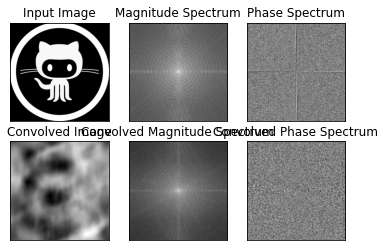

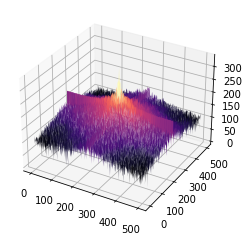

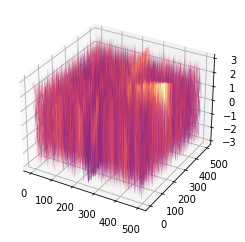

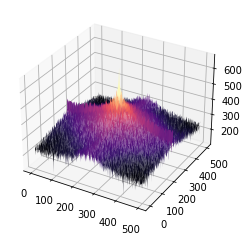

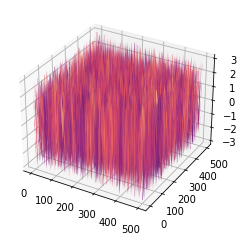

In [61]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def gaussian_convolve(image_path, aperture_path):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    ap = cv2.resize(ap,size)
    
    
    # Set image size and parameters
    size = (500, 500)
   




    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_convolved = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_convolved = np.fft.ifftshift(fshift_convolved).real # shifting back
    # img_convolved = cv2.normalize(img_convolved, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_convolved = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_convolved))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_convolved = 20*np.log(np.abs(fshift_convolved))
    phase_spectrum_convolved = np.angle(fshift_convolved)

    
    
    
    # Display images
    plt.subplot(231),plt.imshow(ap, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_convolved) , cmap = 'gray')
    plt.title('Convolved Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_convolved, cmap = 'gray')
    plt.title('Convolved Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_convolved, cmap = 'gray')
    plt.title('Convolved Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
   
    

#          # for a rendering
#     plt.imsave(f'gaussian_convolved/a_convolved_image_{sigma}.jpg', img_convolved, cmap='gray')
#     plt.imsave(f'gaussian_convolved_magnitude/a_convolved_magnitude_spectrum_{sigma}.jpg', 
#                magnitude_spectrum_convolved, cmap='gray')
#     plt.imsave(f'gaussian_convolved_phase/a_convolved_phase_spectrum_{sigma}.jpg',
#                phase_spectrum_convolved, cmap='gray')
#     plt.imsave(f'gaussian/a_gaussian_{sigma}.jpg',
#                ap, cmap='gray')
    
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_convolved.shape[1]), np.arange(magnitude_spectrum_convolved.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_convolved, cmap='magma')
#     fig.savefig(f'gaussian_convolved_3d_magnitude/a_3d_convolved_magnitude_spectrum_{sigma}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_convolved, cmap='magma')
#     fig.savefig(f'gaussian_convolved_3d_phase/a_3d_convolved_phase_spectrum_{sigma}.jpg', dpi = 200)



    
#     # for b rendering
#     dummy_sigma = 200 - sigma
#     # plt.imsave(f'gaussian_convolved/b_convolved_image_{dummy_sigma}.jpg', img_convolved, cmap='gray')
#     # plt.imsave(f'gaussian_convolved_magnitude/b_convolved_magnitude_spectrum_{dummy_sigma}.jpg', 
#     #           magnitude_spectrum_convolved, cmap='gray')
#     # plt.imsave(f'gaussian_convolved_phase/b_convolved_phase_spectrum_{dummy_sigma}.jpg',
#     #           phase_spectrum_convolved, cmap='gray')
#     plt.imsave(f'gaussian/b_gaussian_{dummy_sigma}.jpg',
#                ap, cmap='gray')
    
    
#     # fig = plt.figure()
#     # ax = fig.add_subplot(111, projection='3d')
#     # X, Y = np.meshgrid(np.arange(magnitude_spectrum_convolved.shape[1]), np.arange(magnitude_spectrum_convolved.shape[0]))
#     # ax.plot_surface(X, Y, magnitude_spectrum_convolved, cmap='magma')
#     # fig.savefig(f'gaussian_convolved_3d_magnitude/b_3d_convolved_magnitude_spectrum_{dummy_sigma}.jpg', dpi = 200)
    
#     # fig = plt.figure()
#     # ax = fig.add_subplot(111, projection='3d')
#     # ax.plot_surface(X, Y, phase_spectrum_convolved, cmap='magma')
#     # fig.savefig(f'gaussian_convolved_3d_phase/b_3d_convolved_phase_spectrum_{dummy_sigma}.jpg', dpi = 200)




    
    # for non-movies rendering
    
    plt.imsave(f'e_convolved_image.jpg', img_convolved, cmap='gray')
    plt.imsave(f'e_convolved_magnitude_spectrum_.jpg', 
               magnitude_spectrum_convolved, cmap='gray')
    plt.imsave(f'e_convolved_phase_spectrum.jpg',
               phase_spectrum_convolved, cmap='gray')
#     plt.imsave(f'd_gaussian.jpg',
#                ap, cmap='gray')
    
    
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.arange(magnitude_spectrum.shape[1]), np.arange(magnitude_spectrum.shape[0]))
    ax.plot_surface(X, Y, magnitude_spectrum, cmap='magma')
    fig.savefig(f'e_3d_unconvolved_magnitude_spectrum.jpg', dpi = 200)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, phase_spectrum, cmap='magma')
    fig.savefig(f'e_3d_unconvolved_phase_spectrum_.jpg', dpi = 200)

    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.arange(magnitude_spectrum_convolved.shape[1]), np.arange(magnitude_spectrum_convolved.shape[0]))
    ax.plot_surface(X, Y, magnitude_spectrum_convolved, cmap='magma')
    fig.savefig(f'e_3d_convolved_magnitude_spectrum.jpg', dpi = 200)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, phase_spectrum_convolved, cmap='magma')
    fig.savefig(f'e_3d_convolved_phase_spectrum_.jpg', dpi = 200)



    
    
    


    
    return img_convolved


gaussian_convolve('input_image.jpg', 'aperture_image.png')



    
    


In [50]:

import os
import re

directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_convolution\gaussian"  

# replace with your directory path
prefix = "b_gaussian_"


# get a list of all files in the directory that start with the prefix
files = [f for f in os.listdir(directory) if f.startswith(prefix)]

for filename in files:
    # extract the number and file extension from the filename
    parts = filename.split("_")
    number = int(parts[-1].split(".")[0])
    extension = parts[-1].split(".")[-1]

    # rename the file with the new padded number
    if number >= 100:
        # already has three digits, do nothing
        new_number = str(number)
    elif number >= 10:
        # add one zero
        new_number = f"0{number}"
    else:
        # add two zeroes
        new_number = f"00{number}"
    new_filename = f"{prefix}{new_number}.{extension}"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
    print(f"Renaming {filename} to {new_filename}")


    
    
    
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_convolution\gaussian_convolved"  
# replace with your directory path
prefix = "b_convolved_image_"


# get a list of all files in the directory that start with the prefix
files = [f for f in os.listdir(directory) if f.startswith(prefix)]

for filename in files:
    # extract the number and file extension from the filename
    parts = filename.split("_")
    number = int(parts[-1].split(".")[0])
    extension = parts[-1].split(".")[-1]

    # rename the file with the new padded number
    if number >= 100:
        # already has three digits, do nothing
        new_number = str(number)
    elif number >= 10:
        # add one zero
        new_number = f"0{number}"
    else:
        # add two zeroes
        new_number = f"00{number}"
    new_filename = f"{prefix}{new_number}.{extension}"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
    print(f"Renaming {filename} to {new_filename}")
    

    
    
    
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_convolution\gaussian_convolved_3d_magnitude"  
# replace with your directory path
prefix = "b_3d_convolved_magnitude_spectrum_"


# get a list of all files in the directory that start with the prefix
files = [f for f in os.listdir(directory) if f.startswith(prefix)]

for filename in files:
    # extract the number and file extension from the filename
    parts = filename.split("_")
    number = int(parts[-1].split(".")[0])
    extension = parts[-1].split(".")[-1]

    # rename the file with the new padded number
    if number >= 100:
        # already has three digits, do nothing
        new_number = str(number)
    elif number >= 10:
        # add one zero
        new_number = f"0{number}"
    else:
        # add two zeroes
        new_number = f"00{number}"
    new_filename = f"{prefix}{new_number}.{extension}"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
    print(f"Renaming {filename} to {new_filename}")
    
    
    
    
    
    
    
    
    
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_convolution\gaussian_convolved_3d_phase"  
# replace with your directory path
prefix = "b_3d_convolved_phase_spectrum_"


# get a list of all files in the directory that start with the prefix
files = [f for f in os.listdir(directory) if f.startswith(prefix)]

for filename in files:
    # extract the number and file extension from the filename
    parts = filename.split("_")
    number = int(parts[-1].split(".")[0])
    extension = parts[-1].split(".")[-1]

    # rename the file with the new padded number
    if number >= 100:
        # already has three digits, do nothing
        new_number = str(number)
    elif number >= 10:
        # add one zero
        new_number = f"0{number}"
    else:
        # add two zeroes
        new_number = f"00{number}"
    new_filename = f"{prefix}{new_number}.{extension}"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
    print(f"Renaming {filename} to {new_filename}")
    
    
    
    
    
    
    

    
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_convolution\gaussian_convolved_magnitude"  
# replace with your directory path
prefix = "b_convolved_magnitude_spectrum_"


# get a list of all files in the directory that start with the prefix
files = [f for f in os.listdir(directory) if f.startswith(prefix)]

for filename in files:
    # extract the number and file extension from the filename
    parts = filename.split("_")
    number = int(parts[-1].split(".")[0])
    extension = parts[-1].split(".")[-1]

    # rename the file with the new padded number
    if number >= 100:
        # already has three digits, do nothing
        new_number = str(number)
    elif number >= 10:
        # add one zero
        new_number = f"0{number}"
    else:
        # add two zeroes
        new_number = f"00{number}"
    new_filename = f"{prefix}{new_number}.{extension}"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
    print(f"Renaming {filename} to {new_filename}")
    
    
    
    
    
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_convolution\gaussian_convolved_phase"  
# replace with your directory path
prefix = "b_convolved_phase_spectrum_"


# get a list of all files in the directory that start with the prefix
files = [f for f in os.listdir(directory) if f.startswith(prefix)]

for filename in files:
    # extract the number and file extension from the filename
    parts = filename.split("_")
    number = int(parts[-1].split(".")[0])
    extension = parts[-1].split(".")[-1]

    # rename the file with the new padded number
    if number >= 100:
        # already has three digits, do nothing
        new_number = str(number)
    elif number >= 10:
        # add one zero
        new_number = f"0{number}"
    else:
        # add two zeroes
        new_number = f"00{number}"
    new_filename = f"{prefix}{new_number}.{extension}"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
    print(f"Renaming {filename} to {new_filename}")
    

Renaming b_gaussian_001.jpg to b_gaussian_001.jpg
Renaming b_gaussian_003.jpg to b_gaussian_003.jpg
Renaming b_gaussian_005.jpg to b_gaussian_005.jpg
Renaming b_gaussian_007.jpg to b_gaussian_007.jpg
Renaming b_gaussian_009.jpg to b_gaussian_009.jpg
Renaming b_gaussian_011.jpg to b_gaussian_011.jpg
Renaming b_gaussian_013.jpg to b_gaussian_013.jpg
Renaming b_gaussian_015.jpg to b_gaussian_015.jpg
Renaming b_gaussian_017.jpg to b_gaussian_017.jpg
Renaming b_gaussian_019.jpg to b_gaussian_019.jpg
Renaming b_gaussian_021.jpg to b_gaussian_021.jpg
Renaming b_gaussian_023.jpg to b_gaussian_023.jpg
Renaming b_gaussian_025.jpg to b_gaussian_025.jpg
Renaming b_gaussian_027.jpg to b_gaussian_027.jpg
Renaming b_gaussian_029.jpg to b_gaussian_029.jpg
Renaming b_gaussian_031.jpg to b_gaussian_031.jpg
Renaming b_gaussian_033.jpg to b_gaussian_033.jpg
Renaming b_gaussian_035.jpg to b_gaussian_035.jpg
Renaming b_gaussian_037.jpg to b_gaussian_037.jpg
Renaming b_gaussian_039.jpg to b_gaussian_039.jpg


In [56]:
import imageio

# using a raw string
# directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\sine_plots\varying_freq"
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_convolution\gaussian_convolved_phase"


# create a list of image file names in the directory
image_files = os.listdir(directory)

# sort the list of image file names to ensure proper ordering in the GIF
image_files.sort()

# define the output GIF file name
output_file = "gaussian_convolved_phase.gif"

# create a list to store the image file paths
image_paths = []

# iterate over the list of image file names and add the file path to image_paths
for filename in image_files:
    if filename.endswith(".jpg"):
        image_paths.append(os.path.join(directory, filename))

# create the GIF from the list of image file paths
with imageio.get_writer(output_file, mode="I") as writer:
    for image_path in image_paths:
        # read the image in RGBA format
        image = imageio.imread(image_path, pilmode="RGBA")
        # set the alpha channel to 255 (fully opaque)
        alpha = image[:, :, 3]
        alpha[alpha != 0] = 255
        image[:, :, 3] = alpha
        # append the image to the GIF
        writer.append_data(image)
